In [1]:
#
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import nan as NA
import sys

In [2]:
#
import matplotlib.pylab as plt
from numpy.random import randn
%matplotlib inline

# Chapter 8: Plotting and Visualization

Plot 2$\times$2 subplots with:
    1. same x ticks, same y ticks
    2. size of [10, 10]
    3. In each subplot, plot histgrame by randn(300). 
    4. Finally, reduce the space between subplots to zero

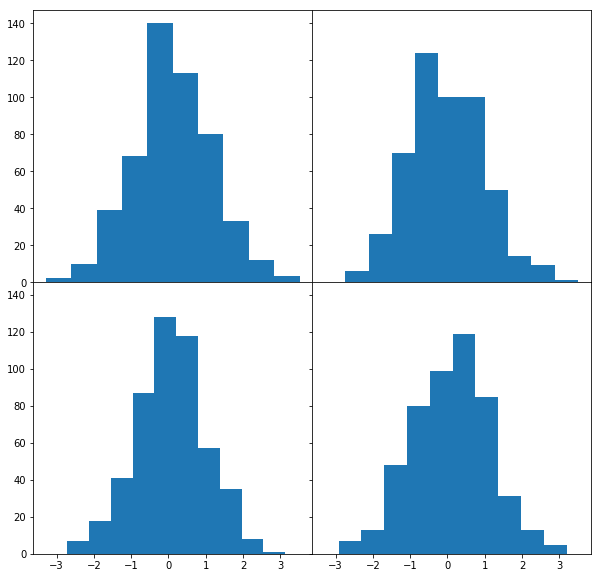

In [3]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500))
plt.subplots_adjust(wspace=0, hspace=0)

Run next cell to create a series 's'

In [4]:
#
s = Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))
s

0     0.404653
10   -0.879583
20   -1.360524
30   -1.598701
40   -0.787265
50   -1.620822
60   -2.095974
70   -3.058744
80   -2.523844
90   -3.356230
dtype: float64

Plot index of s vs. value of s

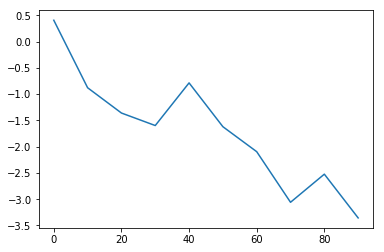

In [5]:
s.plot()

Run next line to create a data frame df

In [6]:
#
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.334560,0.427917,-1.114749,-1.020993
10,-0.435872,-0.148186,-1.776181,-0.980809
20,-1.141262,-0.719348,-1.476645,-0.986878
30,0.450586,0.030494,0.693637,-1.296810
40,-1.120337,-0.291271,0.892764,-0.279306
50,-1.792355,-2.329868,1.035614,-0.836545
60,-0.395735,-2.368119,0.471904,1.926004
70,2.768365,-3.045503,0.284965,1.888774
80,4.864793,-4.413352,0.428358,2.546299
90,6.175902,-5.005460,0.898539,0.536659


Use df.plot to create a figure that:
1. Create line plot of A, B, C, D separately in 2 by 2 design
2. Same x and same y for each subplot
3. Entire figure size is 10 by 10
4. Show grid in each subplot

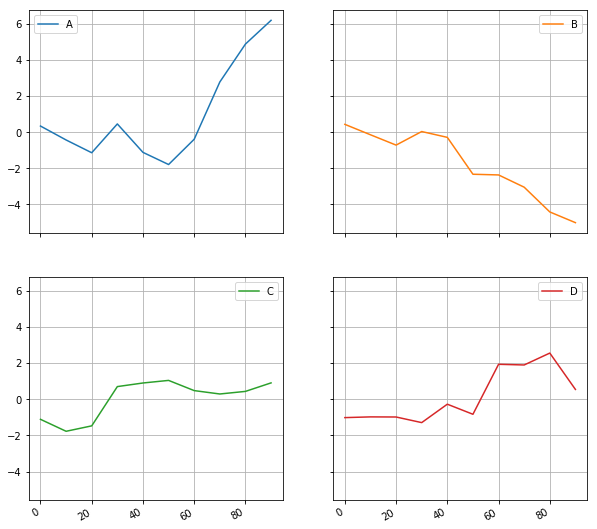

In [7]:
_ = df.plot(subplots=True, sharey=True, sharex=True, 
            figsize=(10, 10), grid=True, layout=(2, 2))

Run next cell to create a DataFrame df

In [8]:
#
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.121511,0.340448,0.897056,0.646774
two,0.092403,0.020013,0.110260,0.924820
three,0.353045,0.275516,0.114077,0.477820
four,0.310683,0.430027,0.374776,0.725581
five,0.220608,0.951169,0.403748,0.006698
six,0.074116,0.847569,0.815968,0.100141


Plot a figure that:
1. Show vertical bar plots of df in subplot 1
2. Show horizontal bar plots of A, B, C, D in subplot 2
3. The subplots have a 2 by 1 grid format
4. The figure size is 10 by 10

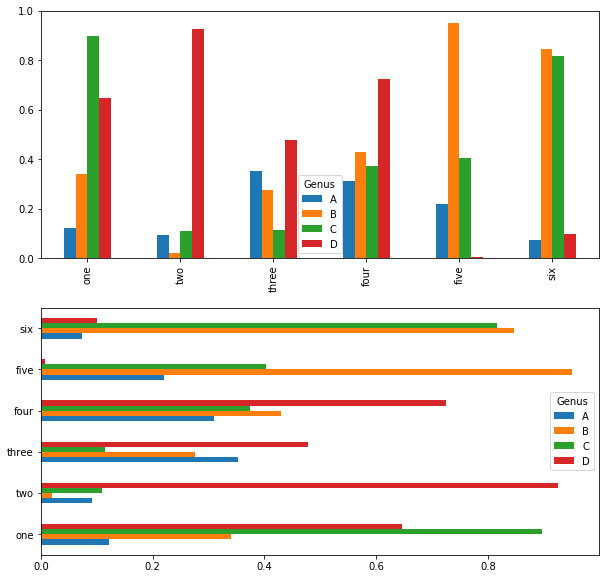

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
df.plot(kind='bar', ax=axes[0])
df.plot(kind='barh', ax=axes[1])

Repeat the last question but make the bar plots stacked

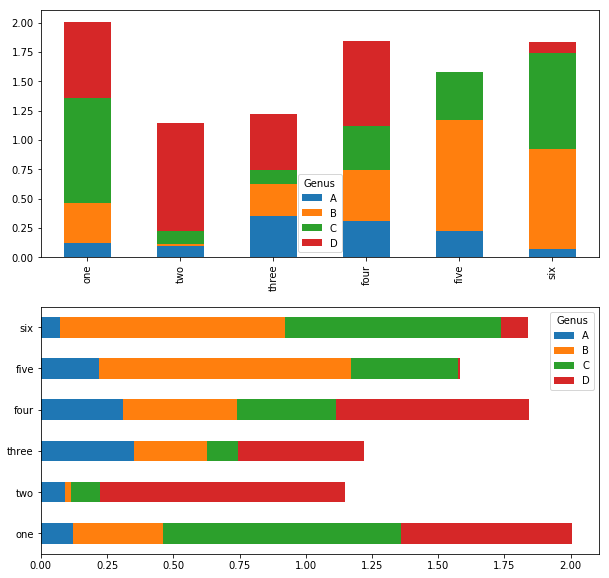

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
df.plot(kind='bar', stacked=True, ax=axes[0])
df.plot(kind='barh', stacked=True, ax=axes[1])

Creat a data frame by loading examples/tips.csv

In [11]:
tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


Create frequency table 'party_counts' to count the occurence of (day, size), where day is the rows and size is the columns

In [12]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


Normalize party_counts to show the frequency of party size in different days. Return the result as 'party_pcts'

In [13]:
party_pcts = party_counts.div(party_counts.sum(1).astype('float32'), axis=0)

In [14]:
party_pcts

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


Create stacked vertical bar plots to display the normalized frequency of each size in each day. Each bar counts a day.

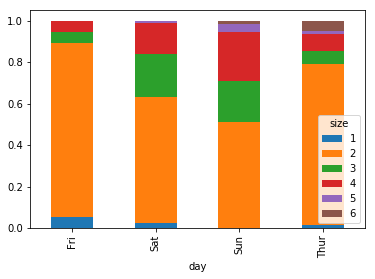

In [15]:
party_pcts.plot(kind='bar', stacked=True)

Add a new column 'tip_pct' of tip ratio to tips. Plot a histogram of 50 bins showing the tip ratio distribution. Show grid in the figure.

In [16]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


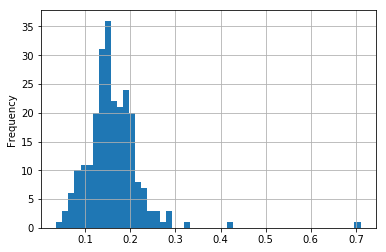

In [17]:
tips['tip_pct'].plot(kind='hist', bins=50, grid=True)

Pot a continuous PDF line to show the distribution of the tip ratio.

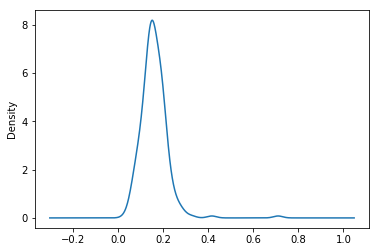

In [18]:
tips['tip_pct'].plot(kind='KDE')

Now plot the last two plots in a single figure of size 10 by 10. Note that the histogram should be normalized.

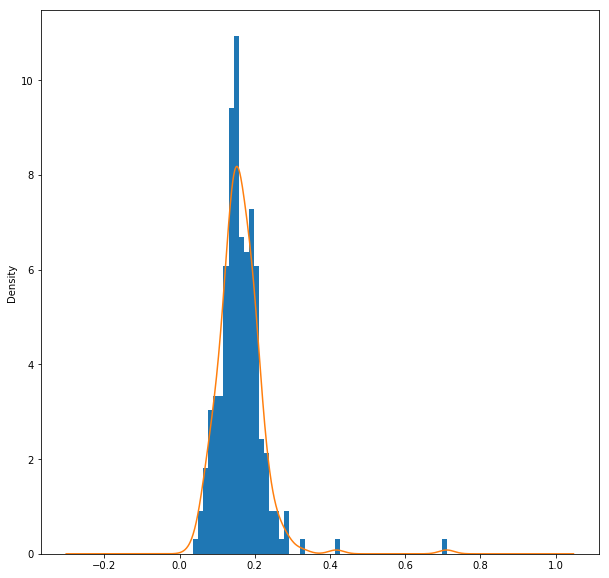

In [19]:
fig, axes = plt.subplots(1,1, figsize=(10, 10))
tips['tip_pct'].plot(kind='hist', bins=50, grid=True, ax=axes, normed=True)
tips['tip_pct'].plot(kind='KDE', ax=axes)

Create a dataframe of 'macro' by loading examples/macrodata.csv. Then create a dataframe 'data' from the columns of cpi, m1, tbilrate and unemp

In [20]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


Create a new data frame 'trans_data' of the increment of data in rows in log scale. And drop the NaN

In [21]:
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


Create scatter matrix from trans_data. Show the PDF of each column in the diagonal of the matrix

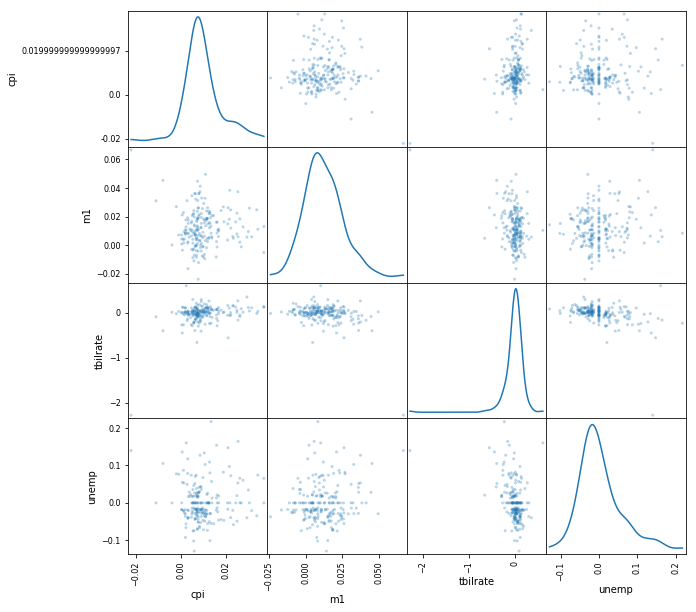

In [22]:
_ = pd.plotting.scatter_matrix(trans_data, figsize=(10, 10), diagonal='kde', alpha=0.3)